# Homework 3 Principal Component Analysis

\begin{equation*}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\bmu}{\boldsymbol{\mu}}
\newcommand{\btheta}{\boldsymbol{\theta}}
\newcommand{\bSigma}{\boldsymbol{\Sigma}}
\newcommand{\bC}{\mathbf{C}}
\newcommand{\bu}{\mathbf{u}}
\newcommand{\bv}{\mathbf{v}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\bX}{\mathbf{X}}
\end{equation*}

## <b>1) 2-D Synthetic Data Generation.</b>
We will generate the same two-dimensional synthetic Gaussian mixture data as in <b>Homework 2</b>, but just for Class 1:

\begin{itemize}

\item Component C:  $\pi_C = \frac{3}{4}$,  $\bmu_C = (0,0)^T$. $\bC_C$ with eigenvalue, eigenvector pairs 
    $\lambda_1 = 1$, $\bu_1 = (\cos \theta,\sin \theta)^T$, $\lambda_2 = 2$, $\bu_2 = (- \sin \theta ,\cos \theta)^T$ with $\theta = \frac{\pi}{3}$.

\item 
    Component D:  $\pi_D = \frac{1}{4}$,  $\bmu_D = (-6,-4)^T$. $\bC_D$ has eigenvalue, eigenvector pairs:
    $\lambda_1 = 2$, $\bu_1 = (\cos \theta,\sin \theta)^T$, $\lambda_2 = 1$, $\bu_2 = (- \sin \theta ,\cos \theta)^T$ with $\theta =  \frac{\pi}{4}$.

\end{itemize}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [2]:

mu_c = np.array([0, 0])
mu_d = np.array([-6, -4])
pi_c = 3/4
pi_d = 1/4

def generate_cov_mtx(lambd_1: float, lambd_2: float, theta: float) -> np.ndarray:
    U = np.array([[np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]]).T
    L = np.diag([lambd_1, lambd_2])
    return U @ L @ U.T


In [3]:
def generate_gmm_data(num_data: int) -> (np.ndarray, np.ndarray):

    num_c = round(num_data * pi_c)
    num_d = num_data - num_c
    C_c = generate_cov_mtx(1, 2, np.pi/3)
    C_d = generate_cov_mtx(2, 1, np.pi/4)
    data_c = np.random.multivariate_normal(mu_c.ravel(), C_c, num_c)
    data_d = np.random.multivariate_normal(mu_d.ravel(), C_d, num_d)
    y = np.ones([num_data, 1])
    # y = np.concatenate((np.zeros([num_data, 1]), np.ones([num_data, 1])))
    data = np.concatenate((data_c, data_d))
    return(data, y)


In [4]:
def plot_gmm_data(data: np.ndarray, label: np.ndarray):
    data_1 = data[label.ravel()==1, :]
    plt.figure()
    # plt.scatter(data_0[:,0], data_0[:,1], c='red', alpha=0.5, marker='^', label='Class 0')
    plt.scatter(data_1[:,0], data_1[:,1], c='blue', alpha=0.5, label='Class 1')
    plt.legend()
    return


In [5]:
def gen_data(N):
    data, label = generate_gmm_data(N)
    return data, label


## <b>2) PCA.</b>
Generate 200 samples from the above Gaussian mixture distribution. Write a function that finds all $d$ principal components for a $d$-dimensional dataset. Using this function, find the first and second principal component of the synthetic data. Plot the first and second principal component vectors along with the scatter plot of the data points. (Note: You will have to center the data for PCA and then shift it back to the original mean for plotting.)

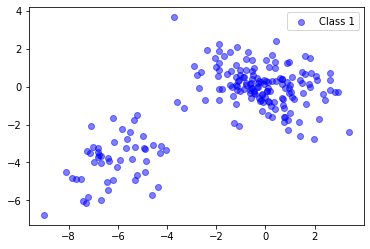

In [6]:
N = 200
data, label = gen_data(N)
plot_gmm_data(data, label)
plt.show()

In [7]:
def pca(X:np.ndarray, d:int):
     # Compute the covariance matrix of X
    cov = np.cov(X.T)
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # Sort the eigenvalues and eigenvectors in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    # Retain the top d eigenvectors
    U = eigenvectors[:, :d]
    S = eigenvalues[:d]
    
    return U, S


In [8]:
mean = np.mean(data, axis=0)
print(mean)
k = 2
U, S = pca(data, k)
print(U, S)

[-1.5943303  -0.94286902]
[[ 0.85608469 -0.51683556]
 [ 0.51683556  0.85608469]] [11.24298354  1.55689209]


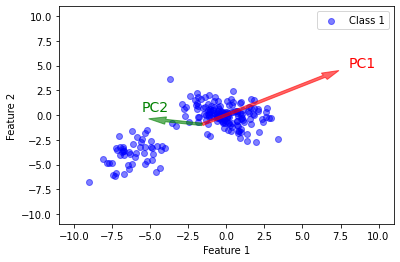

In [9]:
# Plot the data points
plot_gmm_data(data, label)

# Plot the first principal component vector
plt.arrow(mean[0], mean[1], U[0, 0]*S[0]+ mean[0], U[1, 0]*S[0]+ mean[1], width=0.25, color='red', alpha=0.6)
plt.text(U[0, 0]*S[0]+ mean[0], U[1, 0]*S[0]+ mean[1], 'PC1', color='red', fontsize=14)

# Plot the second principal component vector
plt.arrow(mean[0], mean[1], U[0, 1]*S[1] + mean[0], U[1, 1]*S[1] + mean[1], width=0.25, color='green', alpha=0.6)
plt.text(U[0, 1]*S[1] + 3*mean[0], U[1, 1]*S[1] + mean[1], 'PC2', color='green', fontsize=14)

# Set the axis limits
lim = np.max(np.abs(data)) + 2
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Set the axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

## <b>3) PCA on the Olivetti faces dataset.</b>
First, we will load the Olivetti faces dataset and follow the data preparation steps given here. Run your PCA function on the preprocessed face data.

<b>(a)</b> In this case, we will first have to flatten the face images to vectors. If we reshape the principal components back to the original image shape, we call those <b>eigenfaces</b>. Obtain the first and second principal components $\bv_1$ and $\bv_2$ and plot the eigenfaces.

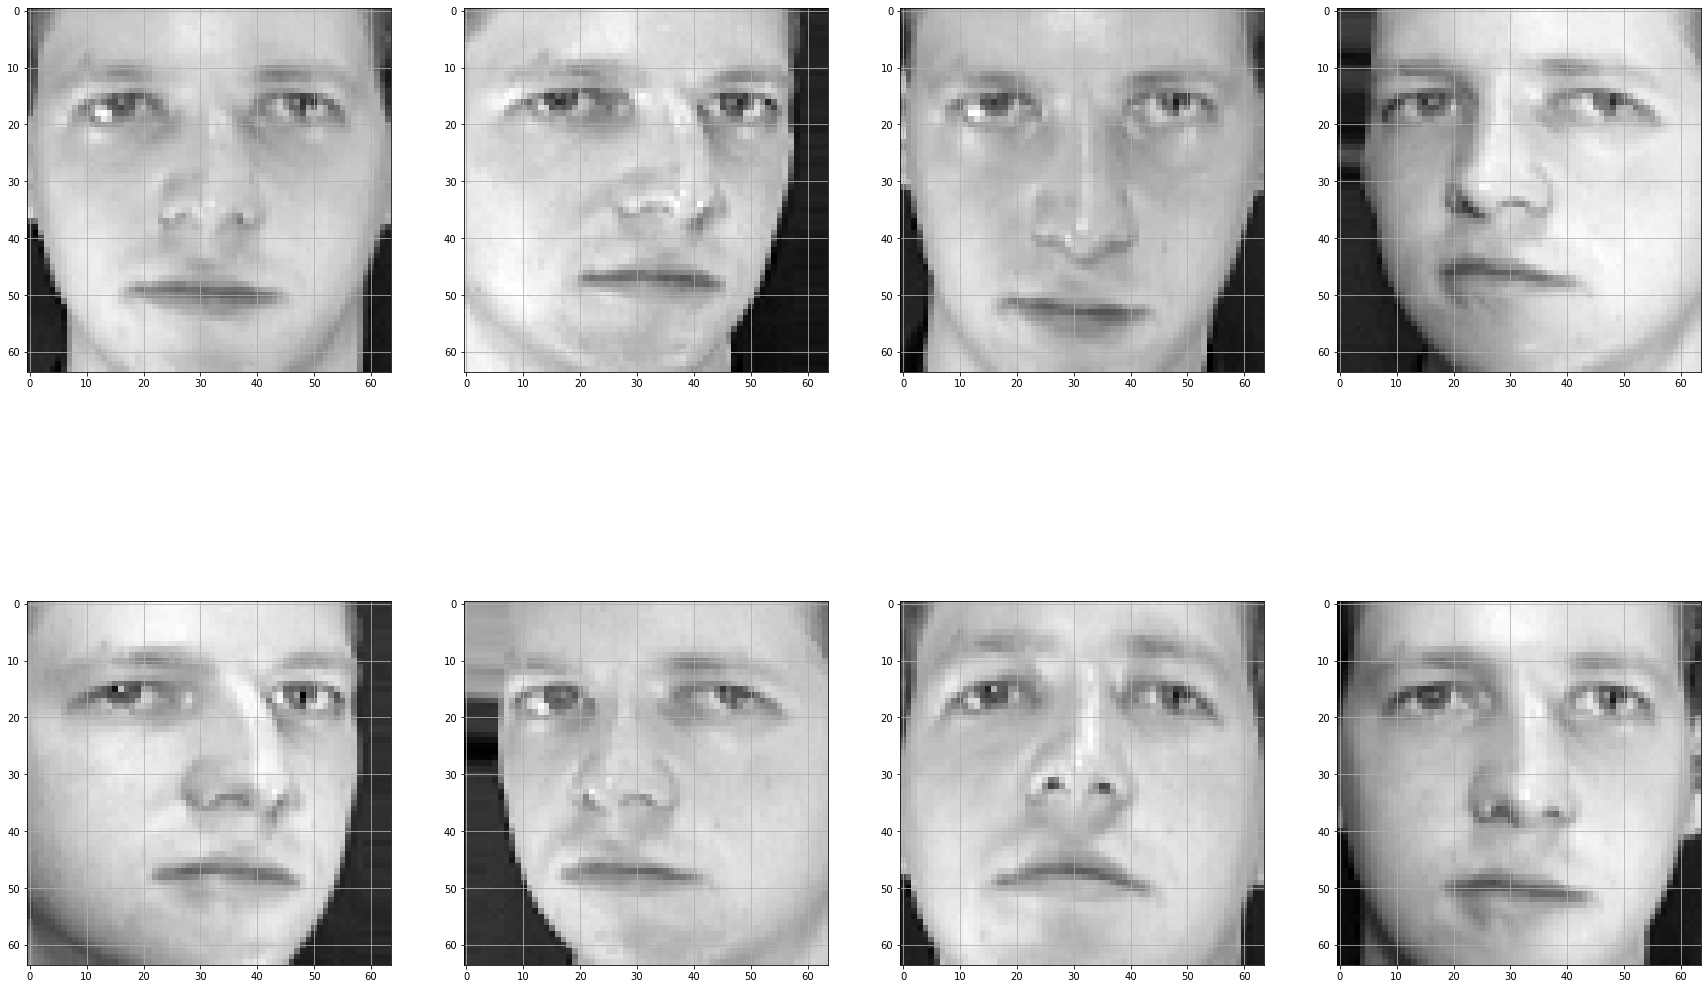

In [10]:
from sklearn.datasets import fetch_olivetti_faces

# method to show images as grid
def show_images(images, grid=True, total_cols=4, figsize=(30, 20)):
    assert len(images) > 0
    assert isinstance(images[0], np.ndarray)
    # extracting length of images i.e 6
    totalImages  = len(images)
    total_cols    = min(totalImages, total_cols)
    total_rows    = int(totalImages / total_cols) + (1 if totalImages % total_cols != 0 else 0)
    # Create a grid of subplots.
    fig, axes = plt.subplots(total_rows, total_cols, figsize=figsize)
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]
    # it will helps to show total images as grid 
    for i in range(totalImages):
        img    = images[i]
        list_axes[i].imshow(img, cmap='gray')
        list_axes[i].grid(grid)

    for i in range(totalImages, len(list_axes)):
        list_axes[i].set_visible(False)

# loading dataset
image_data = fetch_olivetti_faces()
# creating list of 8 images
images = [image_data.images[0], image_data.images[1], image_data.images[2], image_data.images[3], image_data.images[4],image_data.images[5], image_data.images[6], image_data.images[7]]
# Using show_images method to display images
show_images(images, figsize=(30, 20))

In [11]:
# Flattening images
d1, d2, d3 = image_data.images.shape
X = image_data.images.reshape(d1, -1)
mean = np.mean(X, axis=0)
k = 2
U, S = pca(X, k)
print(U, S)

[[-0.0041911 +0.j  0.02859139+0.j]
 [-0.0071095 +0.j  0.03328836+0.j]
 [-0.00933609+0.j  0.0378465 +0.j]
 ...
 [ 0.00018516+0.j -0.02962783+0.j]
 [ 0.00337966+0.j -0.02721299+0.j]
 [ 0.00318826+0.j -0.02488899+0.j]] [18.8401758 +0.j 11.07176208+0.j]


<Figure size 432x288 with 0 Axes>

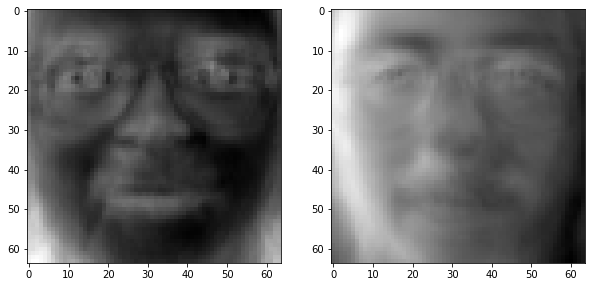

In [24]:
# Eigenvectors

v1 = (U[:, 0].real).reshape(d2, d3)
v2 = (U[:, 1].real).reshape(d2, d3)

plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 

axarr[0].imshow(v1, cmap='gray')
axarr[1].imshow(v2, cmap='gray')

<b>(b)</b> Find the projection of the original images onto $\bv_1$ and $\bv_2$, i.e., $z_1 = \bx^T\bv_1$ and $z_2 = \bx^T\bv_2$. Scatter plot $(z_1, z_2)$ onto the 2D space.

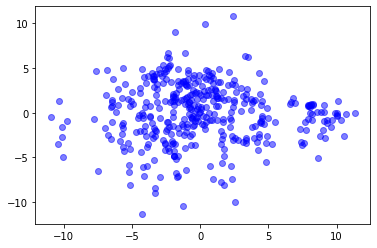

In [25]:
v1 = v1.reshape(-1) # 4096
v2 = v2.reshape(-1)  # 4096

# To find projections onto the eigenvectors, center the data to eigenvector origin.
z1 = (X-mean) @ (v1) #(400 x 4096) * (4096)
z2 = (X-mean) @ (v2) #(400 x 4096) * (4096)
plt.scatter(z1, z2, c='blue', alpha=0.5)

<b>(c)</b> Reconstruct the faces with the first two principal components. Choose three random images and show the original and the reconstructed images side-by-side.

<Figure size 432x288 with 0 Axes>

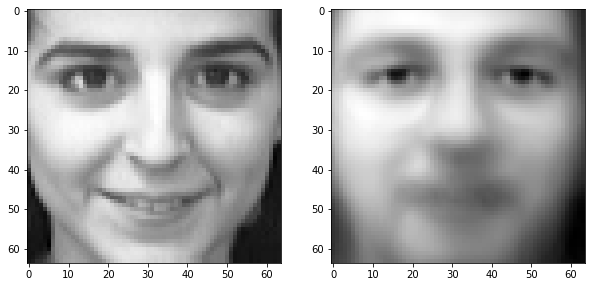

<Figure size 432x288 with 0 Axes>

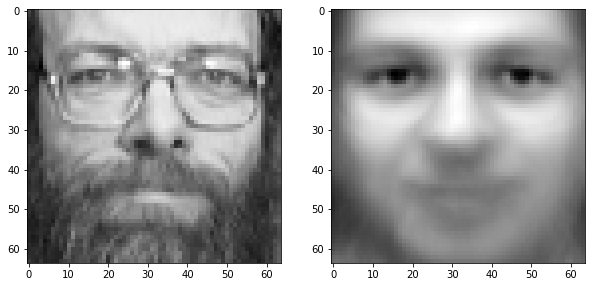

<Figure size 432x288 with 0 Axes>

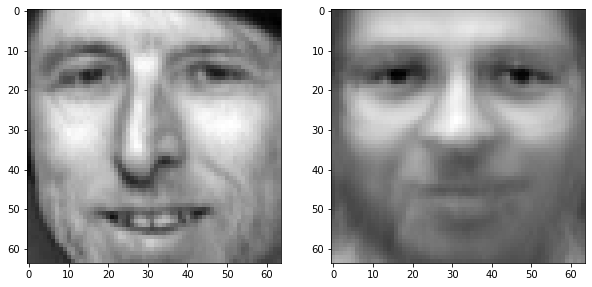

In [27]:
# Reconstruction

reconstructed_faces = np.zeros_like(X)
for i in range(d1):
    c1 = (X[i]- mean)@ v1
    c2 = (X[i]- mean)@ v2
    reconstructed_faces[i] = mean + c1*v1 + c2*v2
    
reconstructed_faces = reconstructed_faces.reshape(d1, d2, d3)

r1 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r1], cmap='gray')
axarr[1].imshow(reconstructed_faces[r1], cmap='gray')

r2 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r2], cmap='gray')
axarr[1].imshow(reconstructed_faces[r2], cmap='gray')
    
r3 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r3], cmap='gray')
axarr[1].imshow(reconstructed_faces[r3], cmap='gray')


<b>(d)</b> Now, reconstruct the faces with the first 10, 20 and 200 principal components and repeat the same side-by-side plots.

<Figure size 432x288 with 0 Axes>

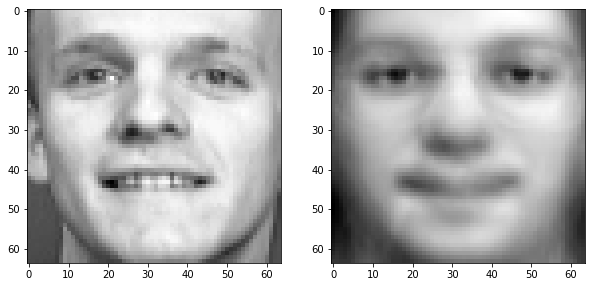

<Figure size 432x288 with 0 Axes>

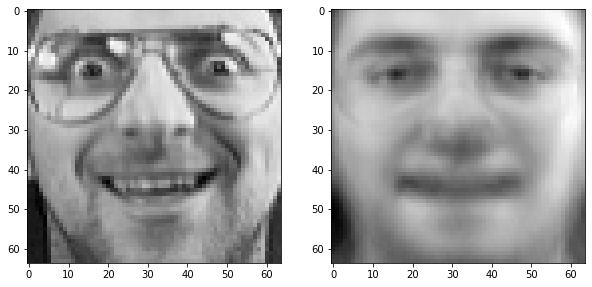

<Figure size 432x288 with 0 Axes>

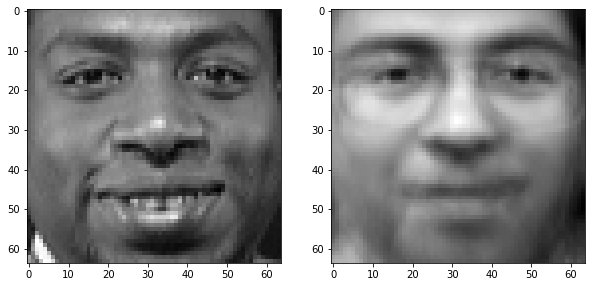

In [30]:
X = image_data.images.reshape(d1, -1)
mean = np.mean(X, axis=0)
k = 10
U, S = pca(X, k)
print(U, S)

# Eigenvectors
v = np.zeros((k, d2*d3))
for i in range(k):
    v[i, :] = (U[:, i].real)

# Reconstruction

reconstructed_faces = np.zeros_like(X)
c= np.zeros((d1, k))

for i in range(d1): # image number 
    reconstructed_faces[i, :] = mean
    for j in range(k): # PCA component 
        c[i,j] = (X[i]- mean)@ v[j]
        reconstructed_faces[i, :] += c[i,j]*v[j]
    
reconstructed_faces = reconstructed_faces.reshape(d1, d2, d3)

r1 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r1], cmap='gray')
axarr[1].imshow(reconstructed_faces[r1], cmap='gray')

r2 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r2], cmap='gray')
axarr[1].imshow(reconstructed_faces[r2], cmap='gray')
    
r3 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r3], cmap='gray')
axarr[1].imshow(reconstructed_faces[r3], cmap='gray')


[[-0.0041911 +0.j  0.02859139+0.j -0.00135691+0.j ... -0.02558666+0.j
  -0.00759667+0.j -0.03041834+0.j]
 [-0.0071095 +0.j  0.03328836+0.j  0.0003258 +0.j ... -0.03091786+0.j
  -0.00654407+0.j -0.03727213+0.j]
 [-0.00933609+0.j  0.0378465 +0.j  0.00019799+0.j ... -0.02938383+0.j
  -0.01577092+0.j -0.0293408 +0.j]
 ...
 [ 0.00018516+0.j -0.02962783+0.j  0.01541365+0.j ...  0.02243986+0.j
   0.00208228+0.j  0.00605112+0.j]
 [ 0.00337966+0.j -0.02721299+0.j  0.01370978+0.j ...  0.02758059+0.j
  -0.00287931+0.j  0.00010898+0.j]
 [ 0.00318826+0.j -0.02488899+0.j  0.01188341+0.j ...  0.02627115+0.j
  -0.00434157+0.j -0.00783847+0.j]] [18.8401758 +0.j 11.07176208+0.j  6.30461472+0.j  3.95458409+0.j
  2.85604263+0.j  2.49770996+0.j  1.92006327+0.j  1.61115887+0.j
  1.54922241+0.j  1.32295079+0.j  1.2621089 +0.j  1.13691018+0.j
  0.98639767+0.j  0.90758982+0.j  0.84092822+0.j  0.77355361+0.j
  0.72714291+0.j  0.64526596+0.j  0.5964511 +0.j  0.59100007+0.j]


<Figure size 432x288 with 0 Axes>

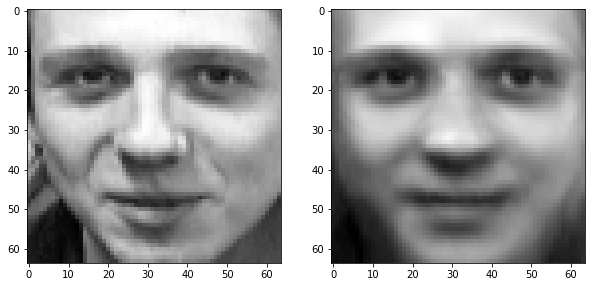

<Figure size 432x288 with 0 Axes>

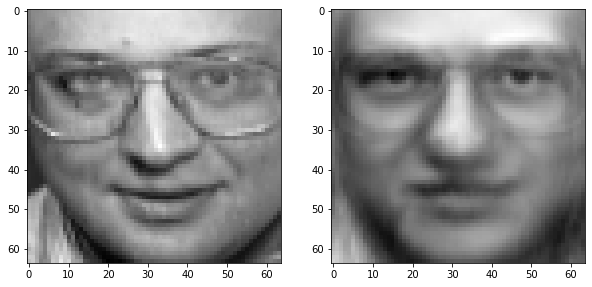

<Figure size 432x288 with 0 Axes>

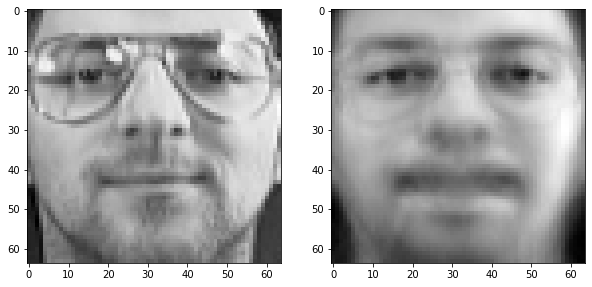

In [31]:
X = image_data.images.reshape(d1, -1)
mean = np.mean(X, axis=0)
k = 20
U, S = pca(X, k)
print(U, S)

# Eigenvectors
v = np.zeros((k, d2*d3))
for i in range(k):
    v[i, :] = (U[:, i].real)

# Reconstruction

reconstructed_faces = np.zeros_like(X)
c= np.zeros((d1, k))

for i in range(d1): # image number 
    reconstructed_faces[i, :] = mean
    for j in range(k): # PCA component 
        c[i,j] = (X[i]- mean)@ v[j]
        reconstructed_faces[i, :] += c[i,j]*v[j]
    
reconstructed_faces = reconstructed_faces.reshape(d1, d2, d3)

r1 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r1], cmap='gray')
axarr[1].imshow(reconstructed_faces[r1], cmap='gray')

r2 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r2], cmap='gray')
axarr[1].imshow(reconstructed_faces[r2], cmap='gray')
    
r3 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r3], cmap='gray')
axarr[1].imshow(reconstructed_faces[r3], cmap='gray')


[[-4.19110344e-03+0.j  2.85913917e-02+0.j -1.35690806e-03+0.j ...
   3.01232548e-02+0.j  2.15021790e-02+0.j -2.51006119e-02+0.j]
 [-7.10950080e-03+0.j  3.32883617e-02+0.j  3.25796997e-04+0.j ...
   2.76401339e-03+0.j  3.72125887e-03+0.j -9.31362902e-03+0.j]
 [-9.33609356e-03+0.j  3.78464972e-02+0.j  1.97989097e-04+0.j ...
  -1.73644311e-02+0.j  1.70681798e-02+0.j -2.82812330e-03+0.j]
 ...
 [ 1.85158524e-04+0.j -2.96278271e-02+0.j  1.54136527e-02+0.j ...
  -1.36265471e-02+0.j  7.11992512e-03+0.j -3.04074887e-02+0.j]
 [ 3.37965507e-03+0.j -2.72129858e-02+0.j  1.37097845e-02+0.j ...
  -1.05107380e-03+0.j -2.22185759e-02+0.j -3.03988074e-03+0.j]
 [ 3.18825641e-03+0.j -2.48889921e-02+0.j  1.18834136e-02+0.j ...
  -7.73822461e-05+0.j -4.87957082e-03+0.j  1.46930871e-02+0.j]] [18.8401758 +0.j 11.07176208+0.j  6.30461472+0.j  3.95458409+0.j
  2.85604263+0.j  2.49770996+0.j  1.92006327+0.j  1.61115887+0.j
  1.54922241+0.j  1.32295079+0.j  1.2621089 +0.j  1.13691018+0.j
  0.98639767+0.j  0.90758

<Figure size 432x288 with 0 Axes>

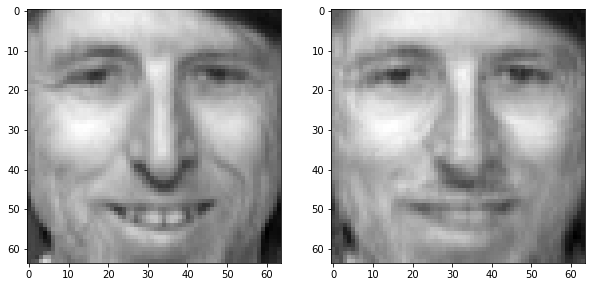

<Figure size 432x288 with 0 Axes>

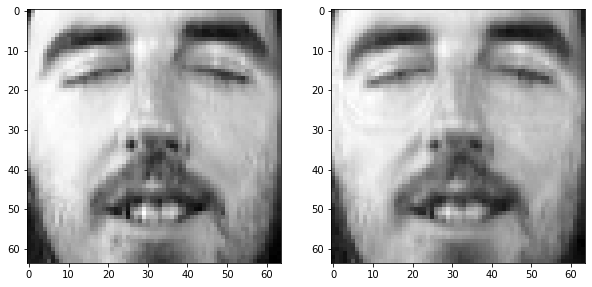

<Figure size 432x288 with 0 Axes>

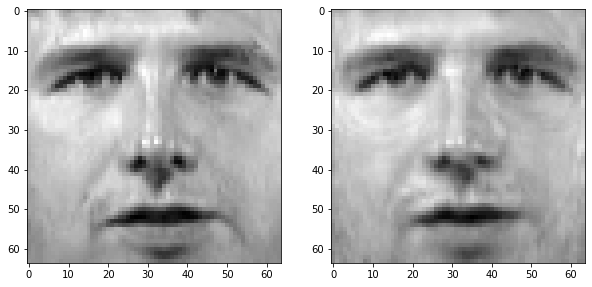

In [32]:
X = image_data.images.reshape(d1, -1)
mean = np.mean(X, axis=0)
k = 200
U, S = pca(X, k)
print(U, S)

# Eigenvectors
v = np.zeros((k, d2*d3))
for i in range(k):
    v[i, :] = (U[:, i].real)

# Reconstruction

reconstructed_faces = np.zeros_like(X)
c= np.zeros((d1, k))

for i in range(d1): # image number 
    reconstructed_faces[i, :] = mean
    for j in range(k): # PCA component 
        c[i,j] = (X[i]- mean)@ v[j]
        reconstructed_faces[i, :] += c[i,j]*v[j]
    
reconstructed_faces = reconstructed_faces.reshape(d1, d2, d3)

r1 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r1], cmap='gray')
axarr[1].imshow(reconstructed_faces[r1], cmap='gray')

r2 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r2], cmap='gray')
axarr[1].imshow(reconstructed_faces[r2], cmap='gray')
    
r3 = np.random.choice(400)
plt.figure()
f, axarr = plt.subplots(1,2,figsize=(10, 5)) 
axarr[0].imshow(image_data.images[r3], cmap='gray')
axarr[1].imshow(reconstructed_faces[r3], cmap='gray')


<b>(e)</b> Gradually vary the number of components we use for reconstruction from 1 to 4096. Compute RMSE for reconstruction. Plot RMSE v.s. the number of components. Discuss what you observe.

In [40]:
# RMSE for reconstruction
from sklearn.metrics import mean_squared_error

X = image_data.images.reshape(d1, -1)
mean = np.mean(X, axis=0)
K = [2**i for i in range(13)]
RMSE_error = []

for k in K:
    # print("k: ", k)
    U, S = pca(X, k)
    # print(U, S)

    # Eigenvectors
    v = np.zeros((k, d2*d3))
    for i in range(k):
        v[i, :] = (U[:, i].real)

    # Reconstruction
    reconstructed_faces = np.zeros_like(X)
    c= np.zeros((d1, k))

    for i in range(d1): # image number 
        reconstructed_faces[i, :] = mean
        for j in range(k): # PCA component 
            c[i,j] = (X[i]- mean)@ v[j]
            reconstructed_faces[i, :] += c[i,j]*v[j]

    RMSE_error.append(mean_squared_error(X, reconstructed_faces, squared=False))    

k:  1
[[-0.0041911 +0.j]
 [-0.0071095 +0.j]
 [-0.00933609+0.j]
 ...
 [ 0.00018516+0.j]
 [ 0.00337966+0.j]
 [ 0.00318826+0.j]] [18.8401758+0.j]
k:  2
[[-0.0041911 +0.j  0.02859139+0.j]
 [-0.0071095 +0.j  0.03328836+0.j]
 [-0.00933609+0.j  0.0378465 +0.j]
 ...
 [ 0.00018516+0.j -0.02962783+0.j]
 [ 0.00337966+0.j -0.02721299+0.j]
 [ 0.00318826+0.j -0.02488899+0.j]] [18.8401758 +0.j 11.07176208+0.j]
k:  4
[[-0.0041911 +0.j  0.02859139+0.j -0.00135691+0.j  0.00112445+0.j]
 [-0.0071095 +0.j  0.03328836+0.j  0.0003258 +0.j -0.0017902 +0.j]
 [-0.00933609+0.j  0.0378465 +0.j  0.00019799+0.j -0.01168215+0.j]
 ...
 [ 0.00018516+0.j -0.02962783+0.j  0.01541365+0.j  0.02943002+0.j]
 [ 0.00337966+0.j -0.02721299+0.j  0.01370978+0.j  0.02781921+0.j]
 [ 0.00318826+0.j -0.02488899+0.j  0.01188341+0.j  0.02521855+0.j]] [18.8401758 +0.j 11.07176208+0.j  6.30461472+0.j  3.95458409+0.j]
k:  8
[[-0.0041911 +0.j  0.02859139+0.j -0.00135691+0.j ... -0.02910192+0.j
  -0.0456244 +0.j  0.00678746+0.j]
 [-0.00710

k:  512
[[-0.0041911 +0.00000000e+00j  0.02859139+0.00000000e+00j
  -0.00135691+0.00000000e+00j ... -0.00517286-1.68368680e-03j
  -0.00517286+1.68368680e-03j -0.00209228-1.41656315e-03j]
 [-0.0071095 +0.00000000e+00j  0.03328836+0.00000000e+00j
   0.0003258 +0.00000000e+00j ... -0.00091495+3.02571207e-04j
  -0.00091495-3.02571207e-04j -0.00047028+7.52765953e-06j]
 [-0.00933609+0.00000000e+00j  0.0378465 +0.00000000e+00j
   0.00019799+0.00000000e+00j ... -0.00106913-3.99684737e-04j
  -0.00106913+3.99684737e-04j  0.00012204+3.95689422e-05j]
 ...
 [ 0.00018516+0.00000000e+00j -0.02962783+0.00000000e+00j
   0.01541365+0.00000000e+00j ... -0.00777049-3.23645081e-03j
  -0.00777049+3.23645081e-03j -0.01278674+4.96715864e-03j]
 [ 0.00337966+0.00000000e+00j -0.02721299+0.00000000e+00j
   0.01370978+0.00000000e+00j ...  0.00421803-4.01863896e-03j
   0.00421803+4.01863896e-03j  0.02102464+4.88844690e-03j]
 [ 0.00318826+0.00000000e+00j -0.02488899+0.00000000e+00j
   0.01188341+0.00000000e+00j ... 

k:  1024
[[-0.0041911 +0.00000000e+00j  0.02859139+0.00000000e+00j
  -0.00135691+0.00000000e+00j ...  0.01008166-1.31239088e-03j
  -0.00014152-1.27434868e-03j -0.00014152+1.27434868e-03j]
 [-0.0071095 +0.00000000e+00j  0.03328836+0.00000000e+00j
   0.0003258 +0.00000000e+00j ...  0.00071149+7.30290758e-04j
  -0.0001355 -4.25581468e-04j -0.0001355 +4.25581468e-04j]
 [-0.00933609+0.00000000e+00j  0.0378465 +0.00000000e+00j
   0.00019799+0.00000000e+00j ...  0.0014785 +6.91314325e-04j
  -0.00064416-5.85279425e-05j -0.00064416+5.85279425e-05j]
 ...
 [ 0.00018516+0.00000000e+00j -0.02962783+0.00000000e+00j
   0.01541365+0.00000000e+00j ...  0.00642465-2.53820992e-03j
  -0.02056679+1.41663606e-02j -0.02056679-1.41663606e-02j]
 [ 0.00337966+0.00000000e+00j -0.02721299+0.00000000e+00j
   0.01370978+0.00000000e+00j ...  0.00709933+7.57884611e-03j
  -0.00631962+9.98861093e-03j -0.00631962-9.98861093e-03j]
 [ 0.00318826+0.00000000e+00j -0.02488899+0.00000000e+00j
   0.01188341+0.00000000e+00j ...

[0.11790274, 0.10677324, 0.094463184, 0.083208635, 0.069895506, 0.05624079, 0.04305418, 0.029150564, 0.013884659, 3.20482e-07, 3.205858e-07, 3.208135e-07, 3.2128287e-07]


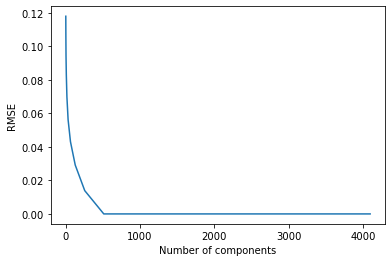

In [41]:
print(RMSE_error)

fig = plt.figure()
ax = plt.axes()
plt.plot(K, RMSE_error)
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.show()

## Discussion

We find out that concatenating the eigenvector projections of images can be used to reconstruct a given image purely from impicitly stored eigenvectors. Thus, once a network is trained to extract a good representation of eigenvectors for a particular task like face recognition, those set of eigenvectors can be used to store the projections for a new image onto the eigenvector space. For testing times, when a new image is shown to the system, it can try to reevaluate the projections and if they match to the initially stored projections, then it's a match. Thus, such a technique is powerful to use in facial recognition system. With increasing eigenvector inclusion in the reconstruction process, we observe that the RMSE errors drop drastically and the reconstruction close up to the original images. But it also takes larger execution time, and hence come with an implicit accuracy-computation time tradeoff.

